# **Assignment 1: Instructions**



*   The due date for this assignment is **Feb 20, 11:59 pm**.

*   Please add your answers to this notebook itself. Please rename the completed notebook as **Assignment_1_YourFirstName_YourLastName.ipynb**, and *upload it to Canvas*.

*   Please feel free to use all class materials to solve these problems. All materials can be found under the "Modules" menu of Canvas. However, **please do not discuss with others**.

*   The assignment consists of 4 questions. Python codes are required for questions 2, 3, and 4, but not for question 1.

*   Unless specified, all values can be fractional. There is no need to round-up any solution.

*   You can upload the completed notebook to Canvas as many times as you wish. Only the last-uploaded version will be graded.

# **Install and Import**

In [ ]:
# We will use pulp solver for solving LP problems.
# Details on the pulp solver can be found at: https://coin-or.github.io/pulp/
# The following line installs the pulp solver. pip is python's package management system.
# The '!' before pip is important

!pip install pulp

# Now that we have installed the solver, the following line imports it, i.e., makes it usable.

from pulp import *

# To perform sensitivity analysis, we will use the GLPK solver.
# Details about this solver can be found here: https://www.gnu.org/software/glpk/

#!apt-get install -y -qq glpk-utils

# **Question 1 (24 Points)**

State whether the following LP problem will have a unique optimal solution, more than one solution, or no optimal solution. Provide reasoning behind your answers.

*You do NOT need to include codes for this question. If you wish, you can add a plot of the feasible area created on  https://www.desmos.com/calculator. Colab lets you upload an image in a text cell.*


1.   $\text{Maximize } x_1 + x_2$\
     **Constraints**:
        *   $x_1 + x_2 \le 4$
        *   $x_1 - x_2 \ge 5$
        *   $x_1, x_2 \ge 0$


2.   $\text{Maximize } 4x_1 + x_2$\
     **Constraints**:
        *   $8x_1 + 2x_2 \le 16$
        *   $5x_1 + 2x_2 \le 12$
        *   $x_1, x_2 \ge 0$
        

3.   $\text{Maximize } -x_1 + 3x_2$\
     **Constraints**:
        *   $x_1 - x_2 \le 4$
        *   $x_1 + 2x_2 \ge 4$
        *   $x_1, x_2 \ge 0$
                

4.   $\text{Maximize } 3x_1 + x_2$\
     **Constraints**:
        *   $2x_1 + x_2 \le 6$
        *   $x_1 + 3x_2 \le 9$
        *   $x_1, x_2 \ge 0$

## **Question 1: Solution**


**Part 1**

Observe that the second constraint, implies $x_1 \ge 5 + x_2$. Since, $x_1,x_2 \ge 0$, $x_1$ needs to be at least $5$ to satisfy the second constraint. However, the maximum value of $x_1$ per constraint 1 is 4. Therefore, there does not exist any $x_1, x_2$ that simultaneously satisfy all the constraints. Hence, **this lp problem is infeasible and no optimal solution can exist** .

**Part 2**   

From the figure below, observe that
  

  *   the feasible region (shaded in gray) is non-empty and bounded. Hence, we are guaranteed to have *at least one* optimal solution.
  *   the iso-objective lines (the red lines) are parallel to the constraint $8x_1 + 2x_2 \le 16$ (the green dashed line).

Hence, any point on the constraint that is a part of the feasible region will be optimal. In other words, **this lp has multiple (infinitely many) optimal solutions**.

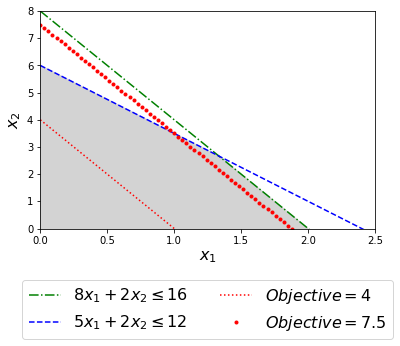

In [ ]:
# Plot for Problem 1 part 2.

from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

x = linspace(0, 3, 100)
y1 = (16 - 8*x)/2
y2 = (12 - 5*x)/2

plot(x,y1,label=r'$8x_1 + 2x_2 \leq 16$',linestyle='-.',color='green')
plot(x,y2,label=r'$5x_1 + 2x_2 \leq 12$',linestyle='--',color='blue')

# For the previous three constraints only
fill([0,0,4/3,2],[0,6,8/3,0],color='lightgray')

y3 = 4 - 4*x
y4 = 7.5 - 4*x

plot(x,y3,label=r'$Objective = 4$',linestyle=':',color='red')
plot(x,y4,'.',label=r'$Objective = 7.5$',color='red')

#annotate("Optimal (0,150)", (0, 200))
#plot(0,150,'ro')
xlim([0,2.5])
ylim([0,8])
xlabel('$x_1$', fontsize=16)
ylabel('$x_2$', fontsize=16)
legend(loc='upper center', bbox_to_anchor=(0.5,-0.2),fancybox=True, shadow=False, ncol=2, fontsize=16)
#savefig('Feasible_Region3.pdf', bbox_inches='tight')
show()

**Part 3**   

Observe that the first constraint can be written as $x_2 >= x_1 - 4$, while the second constraint is $x_1 + 2x_2 \ge 4$. In either of these constraints, there is no limit on how large $x_2$ can be. Moreover, the objective is to *Maximize* $-x_1 + 3x_2$. Hence, we need to set $x_1$ as low as possible (which is $0$ because of the non-negativity constraints), and set $x_2$ as large as possible (but there is no upper limit). Hence, **this lp is unbounded and no optimal solution can exist**.

**Part 4**

From the figure below, observe that
          
*   There is a non-empty and bounded feasible region; hence, we are guaranteed to have an optimal solution.
*   The iso-objective lines (in red) are not parallel to any of the constraints.
*   Since the objective function increases as we move the iso-objective line as far from the origin (the $x_1 = 0, x_2 = 0$ point) as possible, we can see that the corner point $x_1 = 3, x_2 = 0$ (marked in red) is the **unique optimal solution to the lp**.

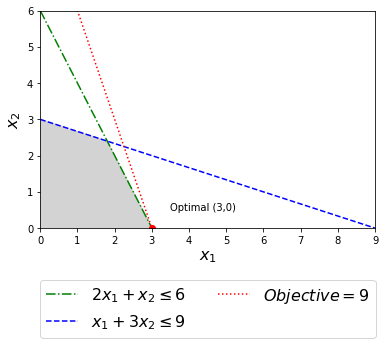

In [ ]:
# Plot for Problem 1 part 2.

from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

x = linspace(0, 9, 100)
y1 = 6 - 2*x
y2 = (9 - x)/3

plot(x,y1,label=r'$2x_1 + x_2 \leq 6$',linestyle='-.',color='green')
plot(x,y2,label=r'$x_1 + 3x_2 \leq 9$',linestyle='--',color='blue')

# For the previous three constraints only
fill([0,0,9/5,3],[0,3,12/5,0],color='lightgray')

y3 = 9 - 3*x

plot(x,y3,label=r'$Objective = 9$',linestyle=':',color='red')

annotate("Optimal (3,0)", (3.5, 0.5))
plot(3,0,'ro')
xlim([0,9])
ylim([0,6])
xlabel('$x_1$', fontsize=16)
ylabel('$x_2$', fontsize=16)
legend(loc='upper center', bbox_to_anchor=(0.5,-0.2),fancybox=True, shadow=False, ncol=2, fontsize=16)
#savefig('Feasible_Region3.pdf', bbox_inches='tight')
show()

# **Question 2: RealWealth (26 Points)**

RealWealth LLC, a real estate investment company, is considering five different investment opportunities all of which mature in 2026. The funds required for each opportunity in years 2024 and 2025, and the final value of each project in 2026 are given below:

|  | Investment 1 | Investment 2 | Investment 3 | Investment 4 | Investment 5 |
|:---:|:---:|:---:|:---:|:---:|:---:|
| **Fund Required in 2024 (in millions of dollars)**  | 11  | 53 | 5 | 5 | 29 |
| **Fund Required in 2025 (in millions of dollars)**  |  3 | 6 | 5 | 1 | 34 |
| **Final Value of Investment in 2026 (in millions of dollars)**  | 13  | 16 | 16 | 14 | 39 |

RealWealth has 40 million dollars avilable for investment in 2024. It estimates that in 2025, another \$20 million will be available for investments. RealWealth may purchase any fraction of each investment in 2024. However, it cannot change this fraction (by buying or selling) in the future.

For example, if RealWealth decides to purchase one-fifth of investment 3, then it must invest $\frac{1}{5}$ of \$5 million = \$1 million
in 2024, and another $\frac{1}{5}$  of \$5 million = \$1 million in 2025. The one-fifth share of investment 3 would yield a value of  $\frac{1}{5}(16)=$ \$3.2 million in 2026.

RealWealth wants to maximize the final value that can be obtained by investing in investments 1–5 in 2026.  Assume that any cash left over in 2024 cannot be used in 2025.  Also assume that all figures in the above table are adjusted to reflect their net present value in 2024 and no other outside investment opportunities are available.


*Formulate an LP that will help RealWealth achieve this goal. Please use Python's pulp package to find the optimal solution of the lp.*

## **RealWealth: Formulation**

RealWealth needs to decide what fraction of each investment to purchase to maximize their final value (i.e., return) in 2024.


**Decision Variables**: $x_1,x_2,x_3,x_4,x_5$, where $x_i$ denotes the fraction of investment $i$ purchased ($i = 1,2,...,5$).

**Objective**: Maximize the total return in 2026 based on this investment.

$$\text{Maximize } 13x_1 + 16x_2 + 16x_3 +14x_4 + 39x_5$$

**Constraints**:

1.   Total fund required in 2024 should be lower than \$40 million: &emsp; $11x_1 + 53x_2 + 5x_3 + 5x_4 + 29x_5 \le 40$
2.   Total fund required in 2025 should be lower than \$20 million: &emsp; $3x_1 + 6x_2 + 5x_3 + x_4 + 34x_5 \le 20$
3.   Fractions must be between 0 and 1: &emsp; $0 \le x_1,x_2,x_3,x_4,x_5 \le 1$


## **RealWealth: Solution**

In [ ]:
from pulp import *


# Note that this is a Maximization Problem and we need to use LpMaximize

prob = LpProblem("RealWealth",LpMaximize)

# Decision Variables
x_1=LpVariable("Investment 1", lowBound = 0, upBound = 1, cat='Continuous')
x_2=LpVariable("Investment 2", lowBound = 0, upBound = 1, cat='Continuous')
x_3=LpVariable("Investment 3", lowBound = 0, upBound = 1, cat='Continuous')
x_4=LpVariable("Investment 4", lowBound = 0, upBound = 1, cat='Continuous')
x_5=LpVariable("Investment 5", lowBound = 0, upBound = 1, cat='Continuous')

# The objective function
prob += 13*x_1 + 16*x_2 + 16*x_3 + 14*x_4 + 39*x_5, "Objective"

# The constraints are
prob += 11*x_1 + 53*x_2 + 5*x_3 + 5*x_4 + 29*x_5 <= 40, "2021_Funds"
prob += 3*x_1 + 6*x_2 + 5*x_3 + x_4 + 34*x_5 <= 20, "2022_Funds"


# Display the problem
print(prob)


# The following line solves the problem.
prob.solve()   # Solver


print("----- Objective -----")

# The next line prints the solution status
print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

print() # blank line
print("----- Decision Variables -----")

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop


for v in prob.variables():
    print(v.name," : ", v.value())


# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# value of each constraint = Left hand side - Right hand side
# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tightl i.e., LHS = RHS. The optimal corner point lies at the intersection of these two constraints, (x=10,y=10).

print() # blank line
print("----- Constraints -----")

for name, cons in prob.constraints.items():
    print(name," : ", cons.value())


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

RealWealth:
MAXIMIZE
13*Investment_1 + 16*Investment_2 + 16*Investment_3 + 14*Investment_4 + 39*Investment_5 + 0
SUBJECT TO
2021_Funds: 11 Investment_1 + 53 Investment_2 + 5 Investment_3
 + 5 Investment_4 + 29 Investment_5 <= 40

2022_Funds: 3 Investment_1 + 6 Investment_2 + 5 Investment_3 + Investment_4
 + 34 Investment_5 <= 20

VARIABLES
Investment_1 <= 1 Continuous
Investment_2 <= 1 Continuous
Investment_3 <= 1 Continuous
Investment_4 <= 1 Continuous
Investment_5 <= 1 Continuous

----- Objective -----
Status :  Optimal
Objective :  57.44901726

----- Decision Variables -----
Investment_1  :  1.0
Investment_2  :  0.20085995
Investment_3  :  1.0
Investment_4  :  1.0
Investment_5  :  0.28808354

----- Constraints -----
2021_Funds  :  1.000000082740371e-08
2022_Funds  :  5.999999963535174e-08


# **Question 3: KC Furniture (25 Points)**

KC Furniture is a local furniture company that manufactures only two products: couches and cabinets. The raw material cost, labor cost, and profit per unit of each product is given below.

| Product | Raw Material Cost | Labor Cost | Profit |
|:---:|:---:|:---:|:---:|
| Couch  | \$50 | \$30  | \$200
| Cabinet | \$35 | \$20  | \$150


Sales in previous months have been low and they have no cash reserves at the moment. Fortunately, due to supply chain delays at other retailers, they expect to be able to sell up to 100 couches and 100 cabinets in February. Hence, KC Furniture has secured a bank loan of up to \$6000 to pay for February's raw material cost. The bank has agreed to a second loan to also pay for February's labor cost, provided that the total labor cost is at least \$2000 lower than the total raw material cost in the month. How many couches and cabinets (can be fractional) should KC Furniture produce in February to maximize total profit?

## **KC Furniture: Formulation**

KC Furniture needs to decide how many couches and cabinets to produce in the month of February.

**Decision Variables**:
* Number of Couches: $x$ <br>
* Number of Cabinets: $y$ <br>


**Objective**: Maximize total profit in February.

$$\text{Maximize } 200x + 150y$$

**Constraints**:

1.   Maximum Couch Demand: &emsp; $x \le 100$
2.   Maximum Cabinet Demand: &emsp; $y \le 100$
3.   Total Labor Cost: &emsp; $50x + 35y \le 6000$
4.   Total Labor Cost: &emsp; $30x + 20y \le 50x + 35y - 2000 \implies 20x + 15y \ge 2000$
5.   Non-negativity: &emsp; $x,y \ge 0$


## **KC Furniture: Solution**

In [ ]:
from pulp import *


# Note that this is a Maximization Problem and we need to use LpMinimize

prob = LpProblem("KC_Furniture",LpMaximize)

# Decision variables
x=LpVariable("Couch", lowBound = 0, upBound = 100, cat='Continuous')
y=LpVariable("Cabinet", lowBound = 0, upBound = 100, cat='Continuous')

# The objective function
prob += 200*x + 150*y, "Objective"

# The constraints are
prob += 50*x + 35*y <= 6000, "Raw_Material_Cost"
prob += 20*x + 15*y >= 2000, "Labor_Cost"



# Display the problem
print(prob)


# The following line solves the problem.
prob.solve()   # Solver

print("----- Objective -----")

# The next line prints the solution status
print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

print() # blank line
print("----- Decision Variables -----")

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop


for v in prob.variables():
    print(v.name," : ", v.value())


# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# value of each constraint = Left hand side - Right hand side
# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tightl i.e., LHS = RHS. The optimal corner point lies at the intersection of these two constraints, (x=10,y=10).

print() # blank line
print("----- Constraints -----")

for name, cons in prob.constraints.items():
    print(name," : ", cons.value())


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.


KC_Furniture:
MAXIMIZE
150*Cabinet + 200*Couch + 0
SUBJECT TO
Raw_Material_Cost: 35 Cabinet + 50 Couch <= 6000

Labor_Cost: 15 Cabinet + 20 Couch >= 2000

VARIABLES
Cabinet <= 100 Continuous
Couch <= 100 Continuous

----- Objective -----
Status :  Optimal
Objective :  25000.0

----- Decision Variables -----
Cabinet  :  100.0
Couch  :  50.0

----- Constraints -----
Raw_Material_Cost  :  0.0
Labor_Cost  :  500.0


# **Question 4: Advertisement Campaign (25 Points)**

LMart, a new department store in Lawrence, is planning a massive advertisement campaign during the Memorial day week. They are considering 4 different advertising channels: TV, Radio, Newspaper, and Online. Each of these channels differ in the cost per ad, the number of impressions per ad (the number of people who viewed/listened to the ad), and the number of visits (either to the website or the physical store) from people of different age groups.

| Channel | Cost per ad | Impressions per ad | Visits from age group 60+| Visits from age group 26-60 | Visits from age group 0-25|
|:---:|:---:|:---:|:---:|:---:|:---:|
| TV  | \$5000 | 400  | 30 | 20 | 20 |
| Radio | \$2000 | 200  | 20 | 20 | 40 |
| Newspaper  | \$3000 | 150  | 0 | 40 | 10 |
| Online  | \$8000 | 500  | 0 | 40 | 50 |

Everyday in that week, LMart wants to achieve at least 500 total impressions,  at least 60 visits from people in the above 60 age group, at least 100 visits from people in the 26-60 age group, and at least 80 visits from people in the 25 and below age group.

*Formulate a LP to help LMart decide how many ads for each channel to buy everyday of that week to minimize their cost while meeting their impression targets. Please use Python's pulp package to find the optimal solution of the lp.*

## **Advertisement Campaign: Formulation**

LMart needs to decide how many ads to purchase for each advertisement channel.

**Decision Variables**: Number of ads for:<br>
* TV: $x_t$ <br>
* Radio: $x_r$ <br>
* Newspaper: $x_n$ <br>
* Online: $x_o$ <br>


**Objective**: Minimize the total advertisement cost.

$$\text{Minimize } 5000x_t + 2000x_r + 3000x_n + 8000x_o$$



**Constraints**:

1.   Total impressions: &emsp; $400x_t + 200x_r + 150x_n + 500x_o \ge 500$
2.   Visits from age group 60+: &emsp; $30x_t + 20x_r + 0x_n + 0x_o \ge 60$
3.   Visits from age group 26-60: &emsp; $20x_t + 20x_r + 40x_n + 40x_o \ge 100$
4.   Visits from age group 0-25: &emsp; $20x_t + 40x_r + 10x_n + 50x_o \ge 80$
5.   Non-negativity: &emsp; $x_t,x_r,x_n,x_o \ge 0$


## **Advertisement Campaign: Solution**

In [ ]:
from pulp import *


# Note that this is a Minimization Problem and we need to use LpMinimize

prob = LpProblem("LMart",LpMinimize)

# Decision variables
x_t=LpVariable("TV", lowBound = 0, upBound = None, cat='Continuous')
x_r=LpVariable("Radio", lowBound = 0, upBound = None, cat='Continuous')
x_n=LpVariable("Newspaper", lowBound = 0, upBound = None, cat='Continuous')
x_o=LpVariable("Online", lowBound = 0, upBound = None, cat='Continuous')

# The objective function
prob += 5000*x_t + 2000*x_r + 3000*x_n + 8000*x_o, "Objective"

# The constraints are
prob += 400*x_t + 200*x_r + 150*x_n + 500*x_o >= 500, "Total_Impressions"
prob += 30*x_t + 20*x_r >= 60, "Visits_60_Up"
prob += 20*x_t + 20*x_r + 40*x_n + 40*x_o >= 100, "Visits_26_60"
prob += 20*x_t + 40*x_r + 10*x_n + 50*x_o >= 80, "Visits_0_25"



# Display the problem
print(prob)


# The following line solves the problem.
prob.solve()   # Solver

print("----- Objective -----")

# The next line prints the solution status
print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

print() # blank line
print("----- Decision Variables -----")

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop


for v in prob.variables():
    print(v.name," : ", v.value())


# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# value of each constraint = Left hand side - Right hand side
# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tightl i.e., LHS = RHS. The optimal corner point lies at the intersection of these two constraints, (x=10,y=10).

print() # blank line
print("----- Constraints -----")

for name, cons in prob.constraints.items():
    print(name," : ", cons.value())


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.


LMart:
MINIMIZE
3000*Newspaper + 8000*Online + 2000*Radio + 5000*TV + 0
SUBJECT TO
Total_Impressions: 150 Newspaper + 500 Online + 200 Radio + 400 TV >= 500

Visits_60_Up: 20 Radio + 30 TV >= 60

Visits_26_60: 40 Newspaper + 40 Online + 20 Radio + 20 TV >= 100

Visits_0_25: 10 Newspaper + 50 Online + 40 Radio + 20 TV >= 80

VARIABLES
Newspaper Continuous
Online Continuous
Radio Continuous
TV Continuous

----- Objective -----
Status :  Optimal
Objective :  9000.0

----- Decision Variables -----
Newspaper  :  1.0
Online  :  0.0
Radio  :  3.0
TV  :  0.0

----- Constraints -----
Total_Impressions  :  250.0
Visits_60_Up  :  0.0
Visits_26_60  :  0.0
Visits_0_25  :  50.0
